In [1]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

639

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retreival     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retreival     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | soldatskiy
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | marsaxlokk
Processing Record 9 of Set 1 | jalu
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | pavlovka
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | salinopolis
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | maragogi
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 

Processing Record 36 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | smithers
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | dargaville
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | puerto escondido
Processing Record 44 of Set 4 | kaspiyskiy
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | hervey bay
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | bagh
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | lianzhou
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Set 5 | cabanas
Processing Record 8 of Set 5 | fort nelson
Process

Processing Record 26 of Set 8 | berlevag
Processing Record 27 of Set 8 | ubauro
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | parangan
Processing Record 30 of Set 8 | neverkino
Processing Record 31 of Set 8 | aksehir
Processing Record 32 of Set 8 | cabo san lucas
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | saskylakh
Processing Record 35 of Set 8 | delvine
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | waingapu
Processing Record 38 of Set 8 | maxixe
Processing Record 39 of Set 8 | lorengau
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | toliary
City not found. Skipping...
Processing Record 44 of Set 8 | paamiut
Processing Record 45 of Set 8 | qui nhon
Processing Record 46 of Set 8 | omboue
Processing Record 47 of Set 8 | tamale
Processing Record 48 of Set 8 | la ronge
Processing Record 49 of Set 8 | marcona
City n

Processing Record 13 of Set 12 | dongsheng
Processing Record 14 of Set 12 | finote selam
Processing Record 15 of Set 12 | brokopondo
Processing Record 16 of Set 12 | duldurga
Processing Record 17 of Set 12 | zhigansk
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | gazli
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | sobolevo
Processing Record 22 of Set 12 | west odessa
Processing Record 23 of Set 12 | micheweni
Processing Record 24 of Set 12 | laramie
Processing Record 25 of Set 12 | chateaudun
Processing Record 26 of Set 12 | jabiru
City not found. Skipping...
Processing Record 27 of Set 12 | maryville
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | oshawa
Processing Record 30 of Set 12 | victoria point
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | jumla
Processing Record 33 of Set 12 | arica
Processing Record 34 of Set 12 | namtsy
Processing Record 35 of Set 12 | great yarm

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.6783,-3.9836,75.25,20,100,7.92,ML,2021-12-20 22:51:00
1,Vaini,-21.2000,-175.2000,86.16,79,40,11.50,TO,2021-12-20 22:51:00
2,Busselton,-33.6500,115.3333,62.04,74,86,12.53,AU,2021-12-20 22:51:01
3,Punta Arenas,-53.1500,-70.9167,55.51,54,0,23.02,CL,2021-12-20 22:47:57
4,Marsaxlokk,35.8419,14.5431,56.08,76,75,6.91,MT,2021-12-20 22:51:02


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2021-12-20 22:51:00,22.6783,-3.9836,75.25,20,100,7.92
1,Vaini,TO,2021-12-20 22:51:00,-21.2000,-175.2000,86.16,79,40,11.50
2,Busselton,AU,2021-12-20 22:51:01,-33.6500,115.3333,62.04,74,86,12.53
3,Punta Arenas,CL,2021-12-20 22:47:57,-53.1500,-70.9167,55.51,54,0,23.02
4,Marsaxlokk,MT,2021-12-20 22:51:02,35.8419,14.5431,56.08,76,75,6.91
...,...,...,...,...,...,...,...,...,...
577,Batagay,RU,2021-12-20 23:16:47,67.6333,134.6333,-39.95,94,100,2.64
578,Qaqortoq,GL,2021-12-20 23:16:48,60.7167,-46.0333,50.50,63,60,19.44
579,Sao Felix Do Xingu,BR,2021-12-20 23:16:48,-6.6447,-51.9950,74.37,97,100,0.92
580,Toamasina,MG,2021-12-20 23:16:49,-18.1667,49.3833,75.20,94,75,4.61


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [1]:
import pandas as pd

In [5]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2021-12-20 22:51:00,22.6783,-3.9836,75.25,20,100,7.92
1,Vaini,TO,2021-12-20 22:51:00,-21.2000,-175.2000,86.16,79,40,11.50
2,Busselton,AU,2021-12-20 22:51:01,-33.6500,115.3333,62.04,74,86,12.53
3,Punta Arenas,CL,2021-12-20 22:47:57,-53.1500,-70.9167,55.51,54,0,23.02
4,Marsaxlokk,MT,2021-12-20 22:51:02,35.8419,14.5431,56.08,76,75,6.91


In [4]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

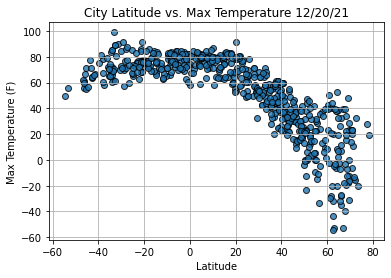

In [9]:
# Impor time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

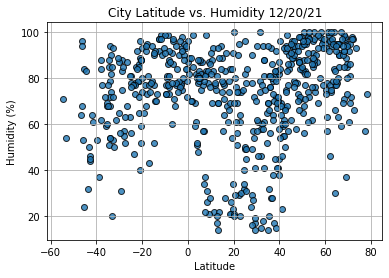

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

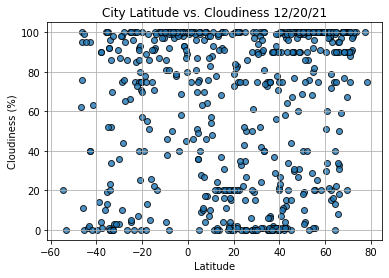

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

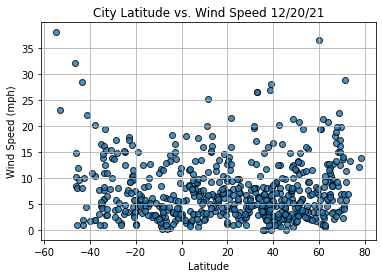

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()